In [ ]:
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats

# Physical deception

The physical deception scenario is called "simple_adversary" in the code. Both teams are rewarded for having a member be close to the green landmark. The "good" team can distinguish the green landmark from the black one, but the adversary team can't. The good team's best strategy is to cover both landmarks.

[Example video](https://github.com/google/maddpg-replication/blob/master/experiments/simple_adversary3/episode_00060000.mp4?raw=true)

In [2]:
def reward_plot(experiment):
    file = open('experiments/' + experiment + '/agrewards.pkl', 'rb')
    data = pickle.load(file)
    file.close()
    adv = [data[3*n] for n in range(int(len(data)/3))]
    ag = [data[3*n + 1] for n in range(int(len(data)/3))]
    x = np.arange(len(adv))
    plt.plot(x, ag, 'b')
    plt.plot(x, adv, 'r', linestyle='dashed')

def success_rate(experiment):
    file = open('experiments/' + experiment + '/benchmark.pkl', 'rb')
    data = pickle.load(file)
    file.close()
    adversary = [e[0][-1][0] for e in data]
    agent = [min(e[0][-1][1][2], e[0][-1][2][2]) for e in data]
    adversary.sort()
    agent.sort()
    return agent, adversary

def success_helper(dd, e):
    return len([d for d in dd if d < e**2]) * 1.0 / len(dd)

def success_helper_multi(thresholds, a, b):
    a_index = 0
    b_index = 0
    a_cum = 0
    b_cum = 0
    a_output = np.zeros(len(thresholds))
    b_output = np.zeros(len(thresholds))
    for i, t in enumerate(thresholds):
        while a_index < len(a) and a[a_index] < t**2:
            a_index += 1
            a_cum += 1
        while b_index < len(b) and b[b_index] < t**2:
            b_index += 1
            b_cum += 1
        a_output[i] = a_cum
        b_output[i] = b_cum
    return (a_output / len(a), b_output / len(b))

def success_plot(experiment):
    agent, adversary = success_rate(experiment)
    x = np.arange(0, 1, .05)
    y, z = success_helper_multi(x, agent, adversary)
    plt.plot(x, y, 'b')
    plt.plot(x, z, 'r', linestyle='dashed')

def success_row(experiments, threshold):
    ag_data = []
    adv_data = []
    for e in experiments:
        ag, adv = success_rate(e)
        ag_data += ag
        adv_data += adv
    ag_data.sort()
    adv_data.sort()
    ag_succ = success_helper(ag_data, threshold)
    adv_succ = success_helper(adv_data, threshold)
    return [ag_succ, adv_succ, ag_succ - adv_succ]

I ran experiments with either maddpg or ddpg for the "good" team or the adversary team. I ran 3 or 4 experiments for each such permutation. Each experiment trained for 60k episodes of 25 frames each. The good team's rewards are the solid blue line, and the adversary team's rewards are the dashed red line. The horizontal axis is in thousands of episodes. Plot titles indicate good team and adversary team, in that order.

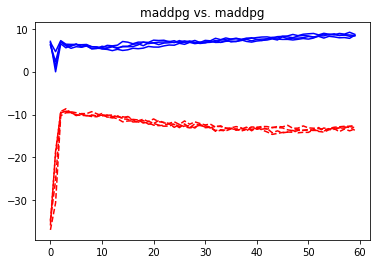

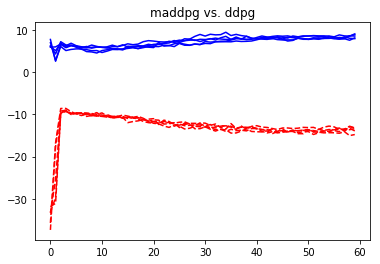

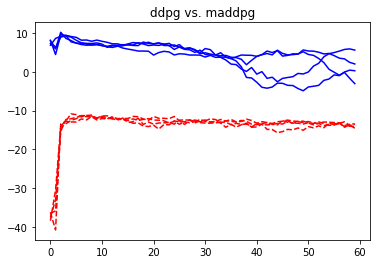

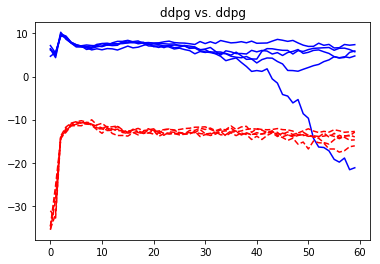

In [3]:
plt.title("maddpg vs. maddpg")
[reward_plot(e) for e in ['simple_adversary3',
                          'simple_adversary_mm2',
                          'simple_adversary_mm3',
                          'simple_adversary_mm4']]

plt.figure()
plt.title("maddpg vs. ddpg")
[reward_plot(e) for e in ['simple_adversary_md',
                          'simple_adversary_md1',
                          'simple_adversary_md2',
                          'simple_adversary_md3',
                          'simple_adversary_md4']]

plt.figure()
plt.title("ddpg vs. maddpg")
[reward_plot(e) for e in ['simple_adversary_dm',
                          'simple_adversary_dm2',
                          'simple_adversary_dm3',
                          'simple_adversary_dm4']]

plt.figure()
plt.title("ddpg vs. ddpg")
_ = [reward_plot(e) for e in ['simple_adversary_dd',
                              'simple_adversary_dd1',
                              'simple_adversary_dd2',
                              'simple_adversary_dd3',
                              'simple_adversary_dd4']]

Table 4 in (Lowe et al. 2017) lists success rates for the physical deception scenario. We look at the last frame of an episode and say that the adversary succeeds if its distance from the goal is less than some threshold $\varepsilon$, and the agents succeed if at least one of them is within $\varepsilon$ distance of the goal. We compute success rate by averaging over ~1000 episodes for each experiment.

These plots show success rate as a function of $\varepsilon$.

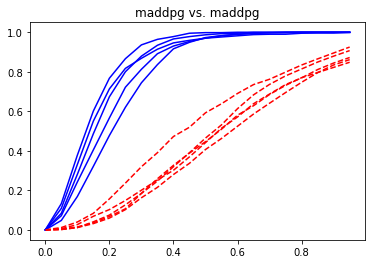

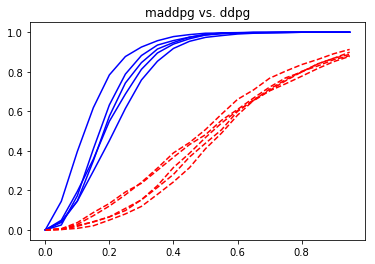

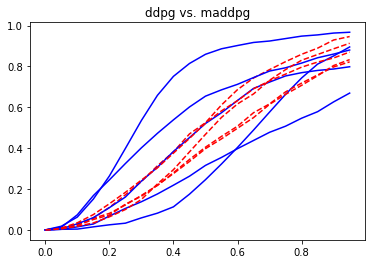

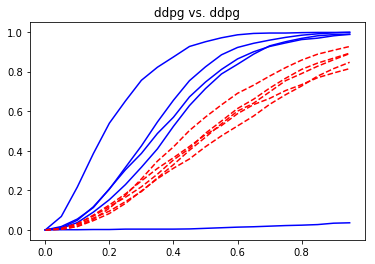

In [4]:
plt.title("maddpg vs. maddpg")
[success_plot(e) for e in ['simple_adversary3',
                           'simple_adversary_mm1',
                           'simple_adversary_mm2',
                           'simple_adversary_mm3',
                           'simple_adversary_mm4']]

plt.figure()
plt.title("maddpg vs. ddpg")
[success_plot(e) for e in ['simple_adversary_md',
                           'simple_adversary_md1',
                           'simple_adversary_md2',
                           'simple_adversary_md3',
                           'simple_adversary_md4']]

plt.figure()
plt.title("ddpg vs. maddpg")
[success_plot(e) for e in ['simple_adversary_dm',
                           'simple_adversary_dm1',
                           'simple_adversary_dm2',
                           'simple_adversary_dm3',
                           'simple_adversary_dm4']]

plt.figure()
plt.title("ddpg vs. ddpg")
_ = [success_plot(e) for e in ['simple_adversary_dd',
                               'simple_adversary_dd1',
                               'simple_adversary_dd2',
                               'simple_adversary_dd3',
                               'simple_adversary_dd4']]

Taking $\varepsilon = 0.4$ gives us results that resemble Table 4 in (Lowe et al. 2017). A notable difference is that ddpg does worse in some experiments compared to the paper. As you can see from the reward curves above, ddpg seems to have more variance between training runs than maddpg.

In [5]:
threshold = 0.4
pd.DataFrame([['maddpg', 'maddpg'] + success_row(['simple_adversary3',
                                                  'simple_adversary_mm1',
                                                  'simple_adversary_mm2',
                                                  'simple_adversary_mm3',
                                                  'simple_adversary_mm4'], threshold),
              ['maddpg', 'ddpg'] + success_row(['simple_adversary_md',
                                                'simple_adversary_md1',
                                                'simple_adversary_md2',
                                                'simple_adversary_md3',
                                                'simple_adversary_md4'], threshold),
              ['ddpg', 'maddpg'] + success_row(['simple_adversary_dm',
                                                'simple_adversary_dm1',
                                                'simple_adversary_dm2',
                                                'simple_adversary_dm3',
                                                'simple_adversary_md4'], threshold),
              ['ddpg', 'ddpg'] + success_row(['simple_adversary_dd',
                                              'simple_adversary_dd1',
                                              'simple_adversary_dd2',
                                              'simple_adversary_dd3',
                                              'simple_adversary_dd4'], threshold),
             ],
             columns=['Agent policy',
                      'Adversary policy',
                      'Agent success rate',
                      'Adversary success rate',
                      'Difference of rates'])

,Agent policy,Adversary policy,Agent success rate,Adversary success rate,Difference of rates
0,maddpg,maddpg,0.947274,0.340124,0.607150
1,maddpg,ddpg,0.948452,0.319281,0.629171
2,ddpg,maddpg,0.446354,0.340460,0.105894
3,ddpg,ddpg,0.525275,0.355844,0.169431


# Cooperative nagivation

The cooperative navigation scenario is called "simple_spread" in the code. There is one team that is rewarded for having members close to all landmarks. Additionally, agents are punished for colliding with each other. The agents have to negotiate an assignment of agents to landmarks just by moving around.

[Example video](https://github.com/google/maddpg-replication/blob/master/experiments/simple_spread_3m0/episode_00200000.mp4?raw=true)

In [7]:
def reward_plot(experiment):
    file = open('experiments/' + experiment + '/agrewards.pkl', 'rb')
    data = pickle.load(file)
    file.close()
    ag = [data[3*n] for n in range(int(len(data)/3))]
    x = np.arange(len(ag))
    plt.plot(x, ag, 'b')

def benchmark_data(benchmark):
    file = open('experiments/' + benchmark, 'rb')
    data = pickle.load(file)
    file.close()
    # For each episode, average over frames of sum over landmarks of minimum over agents
    # of distance from agent to landmark.
    dist = [np.average([fr[0][2] for fr in ep[0]]) for ep in data]
    # For each episode, number of collisions
    coll = [np.sum([(ag[1] - 1)*1.0/2 for fr in ep[0] for ag in fr]) for ep in data]
    return (dist, coll)

def confidence_interval(a):
    return stats.norm.interval(0.95, loc=np.mean(a), scale=stats.sem(a))

def combine_benchmarks(benchmarks):
    dist = []
    coll = []
    for b in benchmarks:
        d, c = benchmark_data(b)
        dist += d
        coll += c
    return [np.average(dist), confidence_interval(dist), np.average(coll), confidence_interval(coll)]

I ran 3 experiments with maddpg and 3 with ddpg, for at least 130k episodes of 25 frames each. Each experiment had 3 agents. As in (Lowe et al. 2017), I used 2 layers of 128 units each.

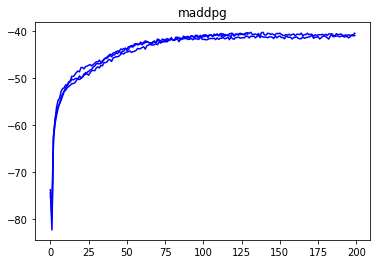

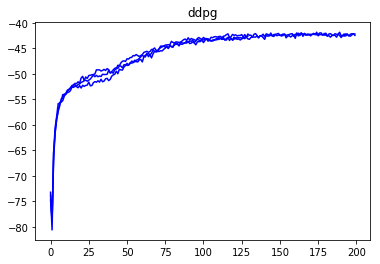

In [8]:
plt.title("maddpg")
[reward_plot(e) for e in ['simple_spread_3m0',
                          'simple_spread_3m1',
                          'simple_spread_3m2',
                         ]]

plt.figure()
plt.title("ddpg")
_ = [reward_plot(e) for e in ['simple_spread_3d0',
                              'simple_spread_3d1',
                              'simple_spread_3d2',
                             ]]

Table 2 in (Lowe et al. 2017) lists the "average agent distance from a landmark" and average number of collisions per episode. We calculate the first quantity as

* the average, over all frames, of
* the sum, over all landmarks, of
* the minimum, over all agents, of
* the distance from the agent to the landmark.

In [9]:
table2 = pd.DataFrame([['maddpg'] + combine_benchmarks(['simple_spread_3m0/benchmark.pkl',
                                                        'simple_spread_3m0/benchmark0.pkl',
                                                        'simple_spread_3m1/benchmark.pkl',
                                                        'simple_spread_3m2/benchmark.pkl',
                                                       ]),
                       ['ddpg'] + combine_benchmarks(['simple_spread_3d0/benchmark.pkl',
                                                      'simple_spread_3d1/benchmark.pkl',
                                                      'simple_spread_3d2/benchmark.pkl',
                                                     ]),
                      ],
                      columns=['Agent policy',
                               'Average distance',
                               'Average distance conf. int.',
                               'Number of collisions',
                               'Number of collisions conf. int.',
                              ])
table2

,Agent policy,Average distance,Average distance conf. int.,Number of collisions,Number of collisions conf. int.
0,maddpg,0.629129,"(0.6266572098523366, 0.6316003731369115)",0.388466,"(0.37659333989611743, 0.40033866887694414)"
1,ddpg,0.692069,"(0.6894267374851221, 0.6947104600859991)",0.370796,"(0.35958099262228926, 0.3820115147936358)"


As in the paper, maddpg beats ddpg in terms of distance, although the magnitudes here differ a lot from the paper.

In terms of number of collisions, the confidence intervals overlap.